## Hacker's earth Hackathon

In [38]:
import pandas as pd
import os,sys,re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

os.chdir("D:/hackathon/he_predictprice/7b9447c625cf11eb/dataset/")

%matplotlib inline

In [40]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
ss = pd.read_csv("sample_submission.csv")

In [43]:
ss.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3294.594688
1,ACCEGCATKHNRXUHW,1945.603968
2,NKCE6GJ5XVJDXNNZ,11871.830880
3,NKCEB8BK3ZXDHDHM,9421.143424
4,TOPEFDXSAHRNPF94,5717.420625


In [41]:
df_train.shape,df_test.shape

((6368, 15), (3430, 14))

In [42]:
df_train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [45]:
len(df_train.Stall_no.unique())

51

In [46]:
len(df_train.Market_Category.unique())

248

In [6]:
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_id,6368,6368,TOPEHZNMGBH5HHGA,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stall_no,6363,NaN,NaN,NaN,25.3094,14.329,1,13,25,37,50
instock_date,6368,5350,2015-08-18 22:08:56.000,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Market_Category,6368,NaN,NaN,NaN,199.341,170.276,0,55,132,403,471
Customer_name,6157,5900,Jordin,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loyalty_customer,6368,2,Yes,3887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Category,6368,10,Pet_care,682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grade,6368,NaN,NaN,NaN,0.643687,1.02509,0,0,0,2,3
Demand,6368,NaN,NaN,NaN,50.9212,29.0919,1,26,51,76,100
Discount_avail,6330,NaN,NaN,NaN,0.140442,0.347473,0,0,0,0,1


In [50]:
df_train.groupby(['Market_Category','Product_Category','Grade']).mean()['Selling_Price']

Market_Category  Product_Category  Grade
0                Child_care        0         1942.207449
                 Cosmetics         0         2621.135733
                 Educational       0         4845.922275
                 Fashion           0         3867.890861
                                   2        10548.762000
                                                ...     
471              Pet_care          2         2168.557225
                 Repair            1         2815.951824
                                   2         1743.171800
                 Technology        1         3076.076304
                                   2         2084.810176
Name: Selling_Price, Length: 1539, dtype: float64

In [51]:
df_train = df_train[df_train['Selling_Price'] > 0]

In [7]:
## Analyze type of columns 

In [52]:
df_train.dtypes

Product_id           object
Stall_no            float64
instock_date         object
Market_Category       int64
Customer_name        object
Loyalty_customer     object
Product_Category     object
Grade                 int64
Demand                int64
Discount_avail      float64
charges_1           float64
charges_2 (%)       float64
Minimum_price       float64
Maximum_price       float64
Selling_Price       float64
dtype: object

In [53]:
df_train['Stall_no'] = df_train['Stall_no'].fillna(df_train['Stall_no'].mean())
df_train['Discount_avail'] = df_train['Discount_avail'].fillna(df_train['Discount_avail'].mean())
df_train['charges_1'] = df_train['charges_1'].fillna(df_train['charges_1'].mean())
df_train['charges_2 (%)'] = df_train['charges_2 (%)'].fillna(df_train['charges_2 (%)'].mean())
df_train['Minimum_price'] = df_train['Minimum_price'].fillna(df_train['Minimum_price'].mean())
df_train['Maximum_price'] = df_train['Maximum_price'].fillna(df_train['Maximum_price'].mean())
df_train['Selling_Price'] = df_train['Selling_Price'].fillna(df_train['Selling_Price'].mean())

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [54]:
df_test['Stall_no'] = df_test['Stall_no'].fillna(df_test['Stall_no'].mean())
df_test['Discount_avail'] = df_test['Discount_avail'].fillna(df_test['Discount_avail'].mean())
df_test['charges_1'] = df_test['charges_1'].fillna(df_test['charges_1'].mean())
df_test['charges_2 (%)'] = df_test['charges_2 (%)'].fillna(df_test['charges_2 (%)'].mean())
df_test['Minimum_price'] = df_test['Minimum_price'].fillna(df_test['Minimum_price'].mean())
df_test['Maximum_price'] = df_test['Maximum_price'].fillna(df_test['Maximum_price'].mean())
Product_id = df_test['Product_id']

In [55]:
df_train.drop('Customer_name', inplace=True, axis=1)
df_test.drop('Customer_name', inplace=True, axis=1)

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


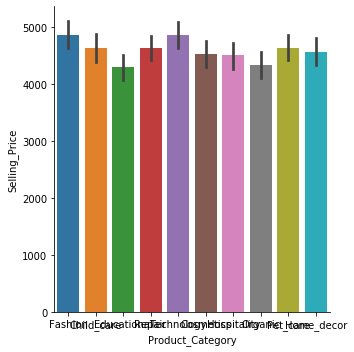

In [56]:
sns.catplot(data=df_train, kind="bar", x="Product_Category", y="Selling_Price")


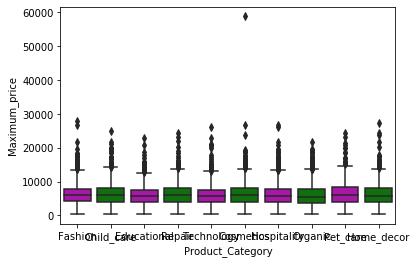

In [57]:
sns.boxplot(x="Product_Category", y="Maximum_price", palette=["m", "g"],
            data=df_train,)

In [59]:
df_train.isnull().sum()


Product_id          0
Stall_no            0
instock_date        0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder 
labelencoder3= LabelEncoder() #initializing an object of class LabelEncoder
df_train['Product_Category'] = labelencoder3.fit_transform(df_train['Product_Category'])
df_test['Product_Category'] = labelencoder3.fit_transform(df_test['Product_Category'])

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
labelencoder1= LabelEncoder() #initializing an object of class LabelEncoder
df_train['Loyalty_customer'] = labelencoder1.fit_transform(df_train['Loyalty_customer'])
df_test['Loyalty_customer'] = labelencoder1.fit_transform(df_test['Loyalty_customer'])

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
labelencoder2= LabelEncoder() #initializing an object of class LabelEncoder
df_train['Product_id'] = labelencoder2.fit_transform(df_train['Product_id'])
df_test['Product_id'] = labelencoder2.fit_transform(df_test['Product_id'])

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
from datetime import datetime
end_date = datetime.today()

df_train['instock_date'] = pd.to_datetime(df_train['instock_date'])
df_test['instock_date'] = pd.to_datetime(df_test['instock_date'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6313 entries, 0 to 6367
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product_id        6313 non-null   int32         
 1   Stall_no          6313 non-null   float64       
 2   instock_date      6313 non-null   datetime64[ns]
 3   Market_Category   6313 non-null   int64         
 4   Loyalty_customer  6313 non-null   int32         
 5   Product_Category  6313 non-null   int32         
 6   Grade             6313 non-null   int64         
 7   Demand            6313 non-null   int64         
 8   Discount_avail    6313 non-null   float64       
 9   charges_1         6313 non-null   float64       
 10  charges_2 (%)     6313 non-null   float64       
 11  Minimum_price     6313 non-null   float64       
 12  Maximum_price     6313 non-null   float64       
 13  Selling_Price     6313 non-null   float64       
dtypes: datetime64[ns](1), fl

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
df_train['dayofweek'] = df_train['instock_date'].dt.dayofweek
df_test['dayofweek'] = df_test['instock_date'].dt.dayofweek

In [64]:
df_train['Day'] = df_train['instock_date'].dt.day
df_train['Month'] = df_train['instock_date'].dt.month
df_train['Year'] = df_train['instock_date'].dt.year
df_test['Day'] = df_test['instock_date'].dt.day
df_test['Month'] = df_test['instock_date'].dt.month
df_test['Year'] = df_test['instock_date'].dt.year
df_train.drop('instock_date', inplace=True, axis=1)
df_test.drop('instock_date', inplace=True, axis=1)

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [65]:
df_train.isnull().values.any()


False

In [66]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = df_train.drop("Selling_Price", axis = 1)
y_train = df_train["Selling_Price"].values
x_train = sc.fit_transform(x_train)
x_test = sc.transform(df_test)

In [73]:
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X = df_train.drop("Selling_Price", axis = 1)
y = df_train["Selling_Price"]

train_features, test_features, train_labels, test_labels = train_test_split(X, y,test_size = 0.25, random_state = 42)

In [78]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squaredlogerror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

#xgb_grid.fit(X,y)

In [86]:
xgb2 = xgb.XGBRegressor(max_depth=7, n_estimators=1200, learning_rate=0.01,objective='reg:linear',
                         tree_method='auto',random_state=42,colsample_bytree=0.6,subsample=0.7,
                        eval_metric ="rmse",
                        gamma=0.2,reg_alpha=0.4,min_child_weight = 3)

In [96]:
xgb.__version__

'0.90'

In [87]:
eval_set = [(train_features, train_labels), (test_features,test_labels)]


In [88]:
xgb2.fit(train_features, train_labels,early_stopping_rounds=10, eval_metric="rmse",eval_set=eval_set)


[14:22:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5420.79	validation_1-rmse:5329.1
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:5369.2	validation_1-rmse:5278.97
[2]	validation_0-rmse:5323.37	validation_1-rmse:5234.06
[3]	validation_0-rmse:5271.76	validation_1-rmse:5182.8
[4]	validation_0-rmse:5225.95	validation_1-rmse:5138.44
[5]	validation_0-rmse:5175.49	validation_1-rmse:5088.1
[6]	validation_0-rmse:5125.31	validation_1-rmse:5038.25
[7]	validation_0-rmse:5079.63	validation_1-rmse:4993.25
[8]	validation_0-rmse:5031.77	validation_1-rmse:4946.59
[9]	validation_0-rmse:4992.34	validation_1-rmse:4908.45
[10]	validation_0-rmse:4945	validation_1-rmse:4862.44
[11]	validation_0-rmse:4896.64	validation_1-rmse:4814.82
[12]	valid

XGBRegressor(colsample_bytree=0.6, eval_metric='rmse', gamma=0.2,
             learning_rate=0.01, max_depth=7, min_child_weight=3,
             n_estimators=1200, random_state=42, reg_alpha=0.4, subsample=0.7,
             tree_method='auto')

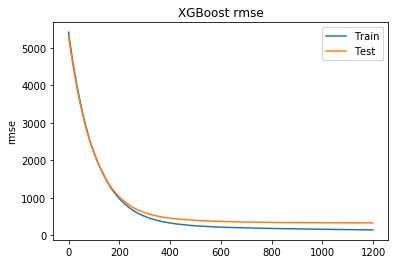

In [92]:
results2 = xgb2.evals_result()
epochs = len(results2['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results2['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results2['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('rmse')
plt.title('XGBoost rmse')
plt.show()

In [69]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.9880374009294274
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [70]:
score = xgb_grid.score(X, y)  
print("Training score: ", score)

Training score:  0.9979349510615741


In [71]:
predictions_test = labelencoder2.inverse_transform(df_test["Product_id"])
predictions_test

array(['SCHE4YSTDVPVZVXW', 'ACCEGCATKHNRXUHW', 'NKCE6GJ5XVJDXNNZ', ...,
       'TUNE8FWQBS7TVVT7', 'NKCEGMUABCRGUZPE', 'RNGE7M92KAQWUBCS'],
      dtype=object)

In [95]:
#test_sales = xgb_grid.predict(df_test)
test_sales
test_sales = xgb2.predict(df_test)


final_df = pd.DataFrame()
final_df["Product_id"] = predictions_test
final_df["Selling_Price"] = test_sales
final_df["Selling_Price"] = np.where(final_df.Selling_Price < 0, 0,final_df.Selling_Price)
final_df.to_csv("Output_2.csv")
final_df.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3326.150879
1,ACCEGCATKHNRXUHW,1872.376343
2,NKCE6GJ5XVJDXNNZ,11184.691406
3,NKCEB8BK3ZXDHDHM,9715.110352
4,TOPEFDXSAHRNPF94,5542.298828


In [67]:
import pickle
import joblib


In [69]:
# save the model to disk
filename = 'model1_price.sav'
joblib.dump(xgb_grid, filename)



['model1_price.sav']

In [72]:

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(test_features, test_labels)
result

[23:09:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9859518235243565

In [1]:
v

NameError: name 'v' is not defined

In [77]:
v = test_features.loc[5990].to_json()

In [87]:
import json
q = pd.DataFrame.from_dict(json.loads(v),orient='index').T

In [88]:
loaded_model.predict(q)

array([10108.439], dtype=float32)

In [ ]:
import requests
url = "http://127.0.0.1:6776/prediciton/"
requests.post(url,data = v)

In [25]:
import json

In [27]:
json.dumps(
{
"values": {'Product_id':6237.0,"Stall_no":44.0,"Market_Category":230.0,
"Loyalty_customer":1.0,"Product_Category":3.0,"Grade":1.0,
"Demand":69.0,"Discount_avail":0.0,"charges_1":397.0,
"charges_2 (%)":15.0,"Minimum_price":7897.0,"Maximum_price":11397.0,
"dayofweek":0.0,"Day":28.0,"Month":3.0,"Year":2016.0}
})

'{"values": {"Product_id": 6237.0, "Stall_no": 44.0, "Market_Category": 230.0, "Loyalty_customer": 1.0, "Product_Category": 3.0, "Grade": 1.0, "Demand": 69.0, "Discount_avail": 0.0, "charges_1": 397.0, "charges_2 (%)": 15.0, "Minimum_price": 7897.0, "Maximum_price": 11397.0, "dayofweek": 0.0, "Day": 28.0, "Month": 3.0, "Year": 2016.0}}'

In [29]:
test_features.columns

Index(['Product_id', 'Stall_no', 'Market_Category', 'Loyalty_customer',
       'Product_Category', 'Grade', 'Demand', 'Discount_avail', 'charges_1',
       'charges_2 (%)', 'Minimum_price', 'Maximum_price', 'dayofweek', 'Day',
       'Month', 'Year'],
      dtype='object')